C:\Users\basde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Proceeding with all 10 factors instead.


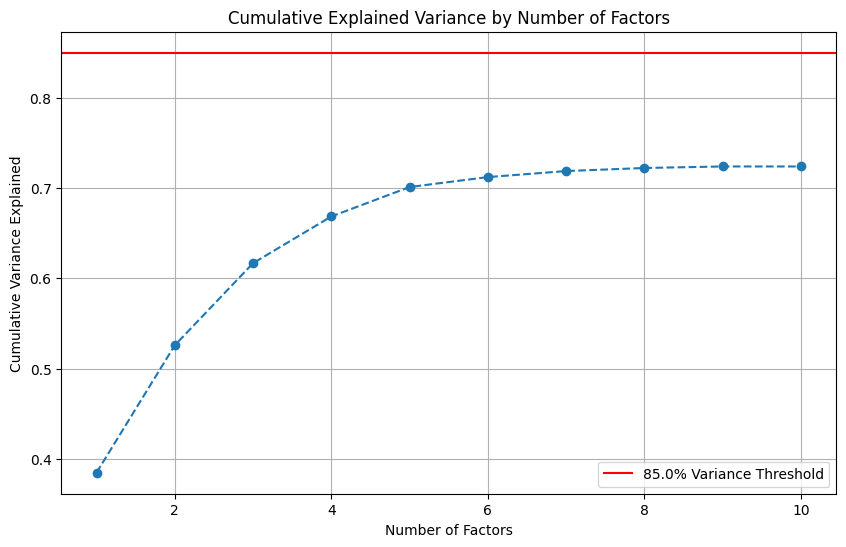

C:\Users\basde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Factor Loadings ---
This table shows how each original variable correlates with the new latent factors.
     Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  Factor 6  Factor 7  \
age  0.136085  0.013901  0.092864  0.108622  0.522091  0.114825  0.023286   
sex  0.030161  0.252627  0.015074  0.017866  0.190382  0.547613  0.025955   
bmi  0.130759  0.237157  0.162973  0.666598  0.151455 -0.036249  0.046192   
bp   0.067076 -0.002769  0.158300  0.469328  0.450673  0.260433 -0.056135   
s1   0.919835 -0.087775  0.298182  0.106180  0.189967 -0.026180  0.041781   
s2   0.960939  0.189545 -0.011648  0.112267  0.126172  0.072554  0.017683   
s3   0.023715 -0.932443 -0.127847 -0.204353 -0.004711 -0.251541 -0.010060   
s4   0.510869  0.676793  0.292483  0.188668  0.094913  0.212618  0.106506   
s5   0.226889  0.247531  0.846360  0.275105  0.236837  0.029919  0.047313   
s6   0.170236  0.149820  0.222083  0.342876  0.373866  0.140310  0.300496   

     Factor 8  Factor 9  Factor 10  
age -0

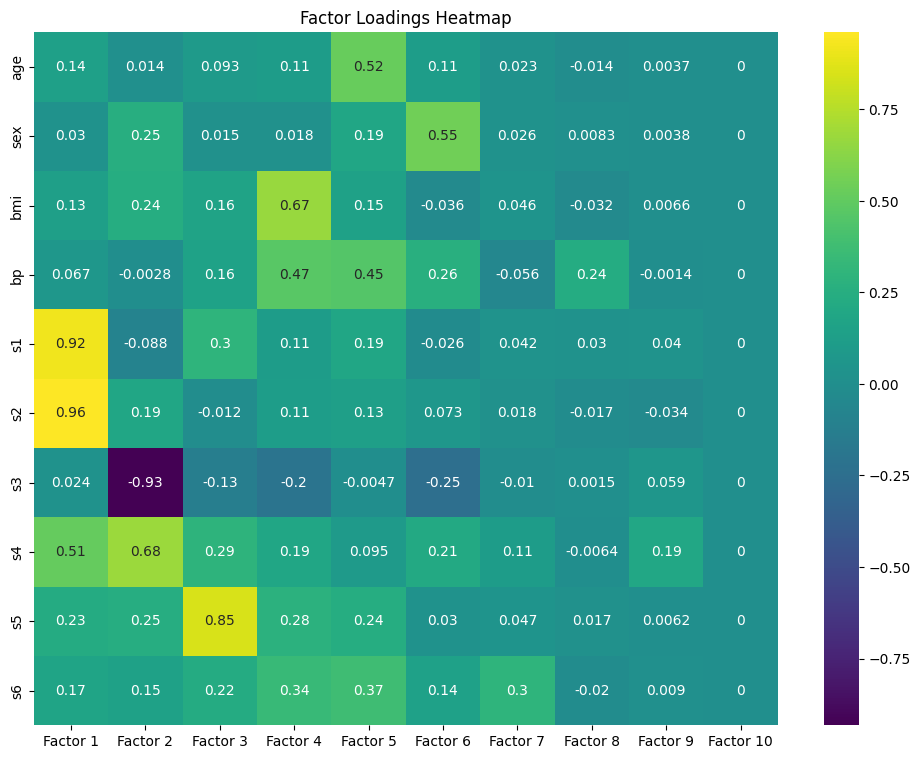


--- Resulting Factor Scores (Head) ---
These are the new variables created by Factor Analysis.
   Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  Factor 6  Factor 7  \
0 -1.083699  0.612652  0.161630  0.822541  0.338183  0.395956 -0.417173   
1  0.076337 -1.168077 -0.801139 -0.909397 -0.474899 -0.394594 -0.229982   
2 -1.022074  0.540851 -0.143839  0.349979  0.539092  0.380763 -0.273218   
3  0.525752  0.931739  0.408935 -0.171099 -1.105181 -0.491417 -0.062213   
4  0.390837  0.046904 -0.740640 -0.316682 -0.066032 -0.140701 -0.446064   

   Factor 8  Factor 9  Factor 10  
0 -0.231236 -0.538695        0.0  
1  0.267775  1.216235        0.0  
2 -0.463496 -0.172560        0.0  
3 -0.242612 -0.320407        0.0  
4  0.343056  0.093260        0.0  

--- Final DataFrame with Factor Scores (Head) ---
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 

C:\Users\basde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from factor_analyzer import FactorAnalyzer

# --- When to Use Factor Analysis & Data Requirements ---
#
# **When to Use:**
# Factor Analysis (FA) is a dimensionality reduction technique used to uncover the
# underlying, unobservable variables (latent factors) from a set of observed variables.
# It's ideal when you believe that the relationships between many correlated variables
# can be explained by a smaller number of fundamental concepts.
# Common uses include market research (finding consumer preference dimensions) and
# psychology (identifying core personality traits).
#
# **Data Requirements:**
# 1. Continuous Variables: Data should be interval or ratio scale.
# 2. Linearity: Assumes a linear relationship between variables and factors.
# 3. Correlation: Some correlation between variables must exist. This is checked
#    with Bartlett's Test of Sphericity (p < 0.05 is good).
# 4. Sampling Adequacy: The variables must be suitable for FA. This is checked
#    with the Kaiser-Meyer-Olkin (KMO) test (value > 0.6 is good).
# 5. Sample Size: A sufficiently large sample size is needed (e.g., >10-15
#    observations per variable).


# --- 1. Load and Prepare the Data ---
# We use the same diabetes dataset from the previous step.
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# For Factor Analysis, it's a good practice to standardize the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


# --- 2. Determine the Number of Factors using Cumulative Variance ---
# We plot the cumulative variance explained by the factors.
# This helps us decide how many factors to retain based on a desired threshold.
fa_test = FactorAnalyzer(n_factors=len(df.columns), rotation=None)
fa_test.fit(df_scaled)

# Get the factor variance information
variances, proportional_variances, cumulative_variances = fa_test.get_factor_variance()

# Set a variance threshold
variance_threshold = 0.85 # We want to explain at least 85% of the variance

# Create the cumulative variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, df_scaled.shape[1] + 1), cumulative_variances, marker='o', linestyle='--')
plt.axhline(y=variance_threshold, color='r', linestyle='-', label=f'{variance_threshold*100}% Variance Threshold')
plt.title('Cumulative Explained Variance by Number of Factors')
plt.xlabel('Number of Factors')
plt.ylabel('Cumulative Variance Explained')
plt.grid()

# --- Why the threshold might not be met ---
# Factor Analysis models only the *common variance* shared between variables, not the
# *total variance*. If variables have a lot of unique variance (information not
# shared with other variables), the total explainable variance by the common factors
# will be low. Therefore, a high threshold (like 85% or 95%) may be impossible to reach.
# The check below handles this by defaulting to all factors if the threshold is not met.

# Find the number of factors needed to meet the threshold.
# This handles the case where the threshold is never met to avoid an IndexError.
recommended_indices = np.where(cumulative_variances >= variance_threshold)[0]

if len(recommended_indices) > 0:
    # If the threshold is met, take the first index where it's met
    n_factors_recommended = recommended_indices[0] + 1
    plt.axvline(x=n_factors_recommended, color='g', linestyle=':', label=f'{n_factors_recommended} Factors Recommended')
    print(f"To explain at least {variance_threshold*100:.0f}% of the variance, we need {n_factors_recommended} factors.")
else:
    # If the threshold is never met, use all factors and issue a warning
    n_factors_recommended = len(df.columns)
    print(f"Warning: The cumulative variance never reached the {variance_threshold*100:.0f}% threshold.")
    print(f"Proceeding with all {n_factors_recommended} factors instead.")

# Let's choose the recommended number of factors for our model.
n_factors = n_factors_recommended

plt.legend()
plt.show()


# --- 3. Apply Factor Analysis ---
# Now, we apply FA with the chosen number of factors.
# We use a rotation (like 'varimax') to make the factor loadings more interpretable.
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(df_scaled)


# --- 4. Interpret the Results: Factor Loadings ---
# The factor loadings represent the correlation of each variable with each factor.
# We'll put them into a DataFrame for easier interpretation.
loadings_df = pd.DataFrame(fa.loadings_, index=df.columns, columns=[f'Factor {i+1}' for i in range(n_factors)])

print("\n--- Factor Loadings ---")
print("This table shows how each original variable correlates with the new latent factors.")
print(loadings_df)

# We can visualize the loadings with a heatmap to easily spot strong correlations.
plt.figure(figsize=(12, 9))
sns.heatmap(loadings_df, annot=True, cmap='viridis')
plt.title('Factor Loadings Heatmap')
plt.show()


# --- 5. Create Factor Scores ---
# We can now transform the original data into the new factor space.
# This creates a new set of variables (the factors).
factor_scores = fa.transform(df_scaled)

# Create a new DataFrame for the factor scores
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor {i+1}' for i in range(n_factors)])

print("\n--- Resulting Factor Scores (Head) ---")
print("These are the new variables created by Factor Analysis.")
print(factor_scores_df.head())


# --- 6. Add Factor Scores to the Original DataFrame ---
# It can be useful to append the new factor scores to the original data for further analysis.
df_final = pd.concat([df.reset_index(drop=True), factor_scores_df], axis=1)

print("\n--- Final DataFrame with Factor Scores (Head) ---")
print(df_final.head())
